In [1]:
import numpy as np
import defs
import appynho

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_28D = defs.read_well('../data/7-MP-28D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB'])

In [4]:
#calculating the DRDN log for all wells
# using the function "drdn" in the file "defs"
drdn_28D = defs.drdn(well_28D['RHOB'], well_28D['NPHI'])
well_28D['DRDN'] = drdn_28D

In [5]:
# calculating the lithology curve for all wells, using the DRDN log
# using the function "create_lithology" in the file "defs"
litho_28D = defs.create_lithology(drdn_28D)
well_28D['LITHOLOGY'] = litho_28D

In [6]:
#setting top and base of the Maracangalha formation
top = 2600.00
base = 2650.00

In [7]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_28D = defs.formation_zone(well_28D, top, base)

In [8]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_28D = defs.separate_lithology(formation_28D, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [9]:
step = 100.0
overlap = 0.0

In [10]:
statistic_28D = defs.statistic_lithology(separate_28D, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB'], step, top, base, overlap)

In [11]:
# a dictionary where the keys are lithology codes and the values are colors code for each lithology
# its necessary for the lithology plot
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = litho_types[lith]['COLOR']

In [25]:
cores[25]='#a9a9a9'

In [26]:
cores

{49: '#ffff3f', 25: '#a9a9a9', 57: '#006400', 54: '#af1d4e'}

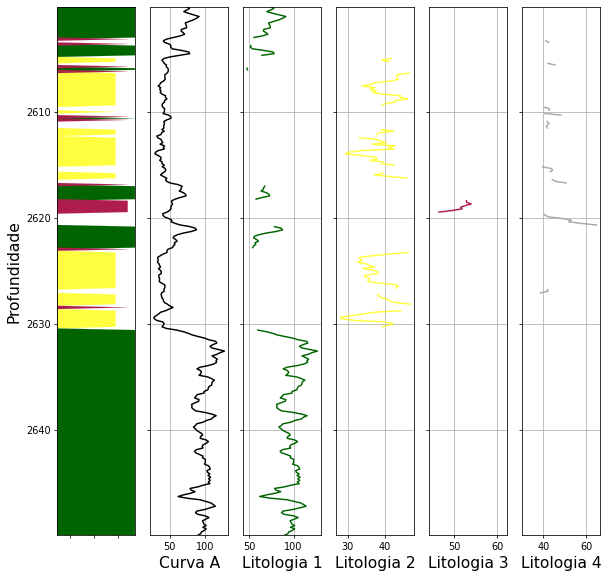

In [28]:
grafico = appynho.plotagem(6, titulo = '', altura = 10, comprimento = 10)
grafico.plot_l(0, separate_28D['LITHOLOGY'], separate_28D['DEPTH'], relacao_cor = cores, curva_limite = separate_28D['LITHOLOGY'], titulo = '', descricao_y = 'Profundidade')
grafico.plot_s(1, separate_28D['GR'], separate_28D['DEPTH'], cor = 'black', descricao_x = 'Curva A', titulo = '')
grafico.plot_s(3, separate_28D['SANDSTONE']['GR']['Data'], separate_28D['DEPTH'], cor = cores[49], descricao_x = 'Litologia 2', titulo = '')
grafico.plot_s(2, separate_28D['SHALE']['GR']['Data'], separate_28D['DEPTH'], cor = cores[57], descricao_x = 'Litologia 1' , titulo = '')
grafico.plot_s(4, separate_28D['SILTITE']['GR']['Data'], separate_28D['DEPTH'], cor = cores[54], descricao_x = 'Litologia 3' , titulo = '')
grafico.plot_s(5, separate_28D['SLURY']['GR']['Data'], separate_28D['DEPTH'], cor = cores[25], descricao_x = 'Litologia 4' , titulo = '')